In [10]:
import pandas as pd

local_features_df = pd.read_csv('generated_csvs/organizer_UbuntuDesktop_games_and_features.csv')

In [11]:
local_features_df[['LudRules', 'PlayoutsPerSecond', 'MovesPerSecond']]

,LudRules,PlayoutsPerSecond,MovesPerSecond
0,"(game ""Haretavl"" (players 2) (equipment { (boa...",259.13,340463.06
1,"(game ""Lotus"" (players 2) (equipment { (board ...",924.89,67446.34
2,"(game ""Musoro Tsoro"" (players 2) (equipment { ...",328.03,46293.75
3,"(game ""Komikan"" (players 2) (equipment { (boar...",592.97,274608.89
4,"(game ""Zola"" (players 2) (equipment { (board (...",219.70,20083.09
5,"(game ""Greater"" (players 2) (equipment { (boar...",41267.11,1000887.85
6,"(game ""Kassle"" (players 2) (equipment { (board...",602.46,28526.03
7,"(game ""Go"" (players 2) (equipment { (board (sq...",164.03,99727.38
8,"(game ""Mogul Putt'han"" (players 2) (equipment ...",216.46,95913.39
9,"(game ""Gabata (Shoa I)"" (players 2) (equipment...",5.21,23061.94


In [12]:
import polars as pl

organizer_features_df = pl.read_csv('../data/from_organizers/train.csv')
# organizer_features_df = pl.read_csv('generated_csvs/organizer_MLServer2_games_and_features_backup.csv')
# organizer_features_df = organizer_features_df.to_pandas()

In [13]:
local_playouts_per_second = local_features_df['PlayoutsPerSecond'].to_numpy()
local_moves_per_second = local_features_df['MovesPerSecond'].to_numpy()

organizer_playouts_per_second = []
organizer_moves_per_second = []
local_lud_rules = local_features_df['LudRules'].to_numpy()
for lud in local_lud_rules:
    relevant_organizer_features = organizer_features_df.filter(organizer_features_df['LudRules'] == lud)

    organizer_playouts_per_second.append(relevant_organizer_features['PlayoutsPerSecond'].to_numpy()[0])
    organizer_moves_per_second.append(relevant_organizer_features['MovesPerSecond'].to_numpy()[0])

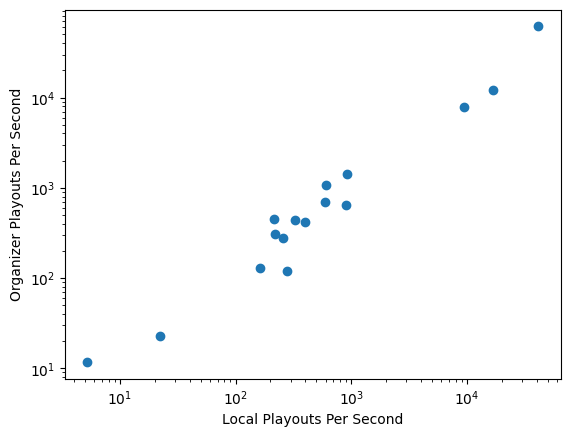

In [14]:
from matplotlib import pyplot as plt

plt.scatter(local_playouts_per_second, organizer_playouts_per_second)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Local Playouts Per Second')
plt.ylabel('Organizer Playouts Per Second')

plt.show()

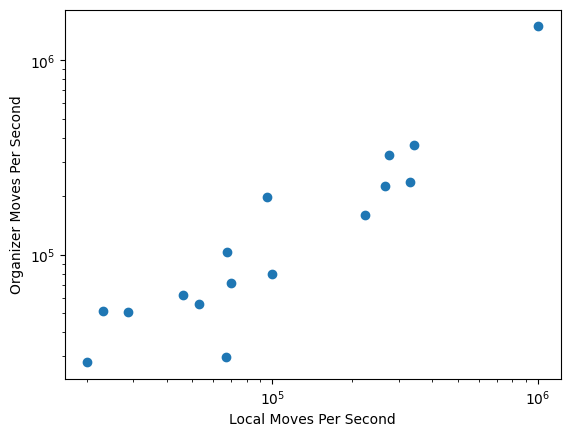

In [15]:
plt.scatter(local_moves_per_second, organizer_moves_per_second)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Local Moves Per Second')
plt.ylabel('Organizer Moves Per Second')

plt.show()

In [16]:
import numpy as np

print(np.mean(local_moves_per_second / organizer_moves_per_second))
print(np.mean(local_playouts_per_second / organizer_playouts_per_second))

0.9659750216551044
0.9716453033112367


In [17]:
np.std(local_moves_per_second / organizer_moves_per_second)

0.4399137131968716

In [18]:
np.std(local_playouts_per_second / organizer_playouts_per_second)

0.4562648155487953